# /*******************************************************
* Copyright         : 2022 Vaibhav Khandare
* Description       : Unsupervised Learning:- This is the unsupervised learning task which has the satisfaction and loyalty
*                    
* Revision History  :
* 		Author 		
        Vaibhav Khandare 
* ------------------------------------------------------------------
/******************************************************************/

In [ ]:
import pandas as pd

In [2]:
ds = pd.read_csv("Example.csv")

In [3]:
ds.columns


Index(['Satisfaction', 'Loyalty'], dtype='object')

In [4]:
ds.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [5]:
ds.tail()

,Satisfaction,Loyalty
25,9,-0.99
26,10,0.37
27,9,0.03
28,3,-1.36
29,5,0.73


In [7]:
ds.sort_values(by=['Satisfaction', 'Loyalty'], ascending=True, inplace=False)

,Satisfaction,Loyalty
5,1,-1.66
13,2,0.67
21,3,-1.69
28,3,-1.36
23,3,-0.96
0,4,-1.33
22,4,1.04
4,4,1.06
12,5,-1.69
2,5,-0.99


In [8]:
ds.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


In [9]:
import matplotlib.pyplot as plt 

In [10]:
sat = ds['Satisfaction']

In [11]:
loy = ds['Loyalty']

Text(0, 0.5, 'Loyalty')

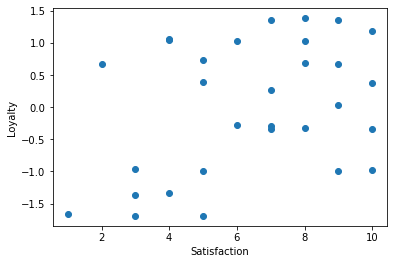

In [12]:
plt.scatter(sat, loy)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
data_scaled = sc.fit_transform(ds)

In [17]:
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=4)

In [20]:
model.fit(data_scaled)

KMeans(n_clusters=5)

In [21]:
model.inertia_

7.792695153937187

In [39]:
WCSS = []

for i in range(1, 5):
    model = KMeans(n_clusters=i)
    model.fit(data_scaled)
    w = model.inertia_
    WCSS.append(w)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


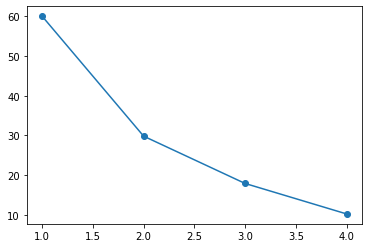

In [41]:
plt.plot(range(1,5), WCSS, marker='o')

In [42]:
pred = model.fit_predict(data_scaled)

In [43]:
pred

array([1, 2, 1, 2, 0, 1, 2, 2, 3, 3, 2, 0, 1, 0, 2, 3, 3, 3, 2, 3, 3, 1,
       0, 1, 0, 2, 3, 2, 1, 0])

In [44]:
data_scaled1 = pd.DataFrame(data_scaled, columns=['Sat', 'Loy'])

In [45]:
data_scaled1['Cluster Name'] = pred

In [46]:
ds['Cluster Name'] = pred

In [47]:
ds

,Satisfaction,Loyalty,Cluster Name
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


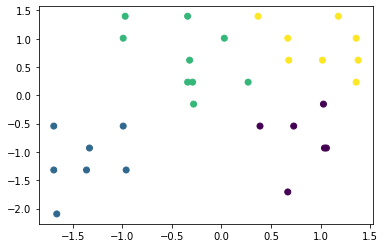

In [48]:
plt.scatter(data_scaled1['Loy'], data_scaled1['Sat'], c = data_scaled1['Cluster Name'])